In [1]:
import zipline
from zipline.api import order_target_percent, record, symbol, set_benchmark, get_open_orders
from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities

from trading_calendars import get_calendar

from zipline.api import get_datetime, order_percent

from datetime import datetime
import pytz
import pandas as pd
import numpy as np
import pyfolio as pf
import seaborn as sns
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

In [6]:
def initialize(context):
    set_benchmark(symbol('WLD.PA'))
    context.stock = symbol('WLD.PA')
    context.long_bond = symbol('IDTL.L')
    context.mid_bond = symbol('CBU7.AS')
    context.gold = symbol('IAUP.L')
    context.commodity = symbol('CRB.PA')
    
    context.stock_position = 0.30
    context.long_bond_position = 0.40
    context.mid_bond_position = 0.15
    context.gold_position = 0.075
    context.commodity_position = 0.075
    
    #context.stock_position = 1
    #context.long_bond_position = 0
    #context.mid_bond_position = 0
    #context.gold_position = 0
    #context.commodity_position = 0
    
    context.rebalance_inteval = 365
    context.rebalance_date = 0
 
    context.fired = False

In [7]:
def rebalance(context, data):
    values = context.portfolio.portfolio_value
    
    order_percent(context.stock,0)
    order_percent(context.long_bond,0)
    order_percent(context.mid_bond,0)
    order_percent(context.gold,0)
    order_percent(context.commodity,0)
    
    order_target_percent(context.stock,context.stock_position)
    order_target_percent(context.long_bond, context.long_bond_position)
    order_target_percent(context.mid_bond, context.mid_bond_position)
    order_target_percent(context.gold,context.gold_position)
    order_target_percent(context.commodity, context.commodity_position)

In [8]:
def handle_data(context, data):
    if not context.fired:
        order_target_percent(context.stock,context.stock_position)
        order_target_percent(context.long_bond, context.long_bond_position)
        order_target_percent(context.mid_bond, context.mid_bond_position)
        order_target_percent(context.gold, context.gold_position)
        order_target_percent(context.commodity, context.commodity_position)
        context.rebalance_date = get_datetime()
        print("build portfolio at " + str(context.rebalance_date))
        context.fired = True
    else:
        now = get_datetime()
        if (now.year > context.rebalance_date.year):
            print("new year arrivied:" + str(now))
            
            context.rebalance_date = now
            rebalance(context, data)

In [12]:
start = datetime(2015, 1, 21, 0, 0, 0, 0, pytz.utc)
end = datetime(2020, 4, 24, 0, 0, 0, 0, pytz.utc)
#start = datetime(2017, 1, 1, 0, 0, 0, 0, pytz.utc)
#end = datetime(2020, 2, 26, 0, 0, 0, 0, pytz.utc)

perf = zipline.run_algorithm(start=start,
                end=end,
                initialize=initialize,
                capital_base=10000,
                bundle='yahoo_csv_bundle_allweather',
                handle_data=handle_data)

build portfolio at 2015-01-21 21:00:00+00:00
new year arrivied:2016-01-04 21:00:00+00:00
new year arrivied:2017-01-03 21:00:00+00:00
new year arrivied:2018-01-02 21:00:00+00:00
new year arrivied:2019-01-02 21:00:00+00:00
new year arrivied:2020-01-02 21:00:00+00:00


Start date,2015-01-21
End date,2020-04-24
Total months,63
,Backtest
Annual return,3.5%
Cumulative returns,19.8%
Annual volatility,10.0%
Sharpe ratio,0.39
Calmar ratio,0.27
Stability,0.50
Max drawdown,-13.2%


/Users/cedriss/miniconda3/envs/env_zipline/envs/env_zipline_remote/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,13.15,2015-04-15,2016-01-19,2016-06-29,316
1,12.58,2020-02-21,2020-03-18,2020-04-23,45
2,10.93,2016-07-11,2018-02-08,2019-06-03,756
3,3.49,2020-04-23,2020-04-24,NaT,NaN
4,3.27,2019-09-03,2019-09-13,2020-01-15,97


Stress Events,mean,min,max
Fall2015,-0.11%,-2.71%,1.90%
New Normal,0.02%,-5.82%,4.71%


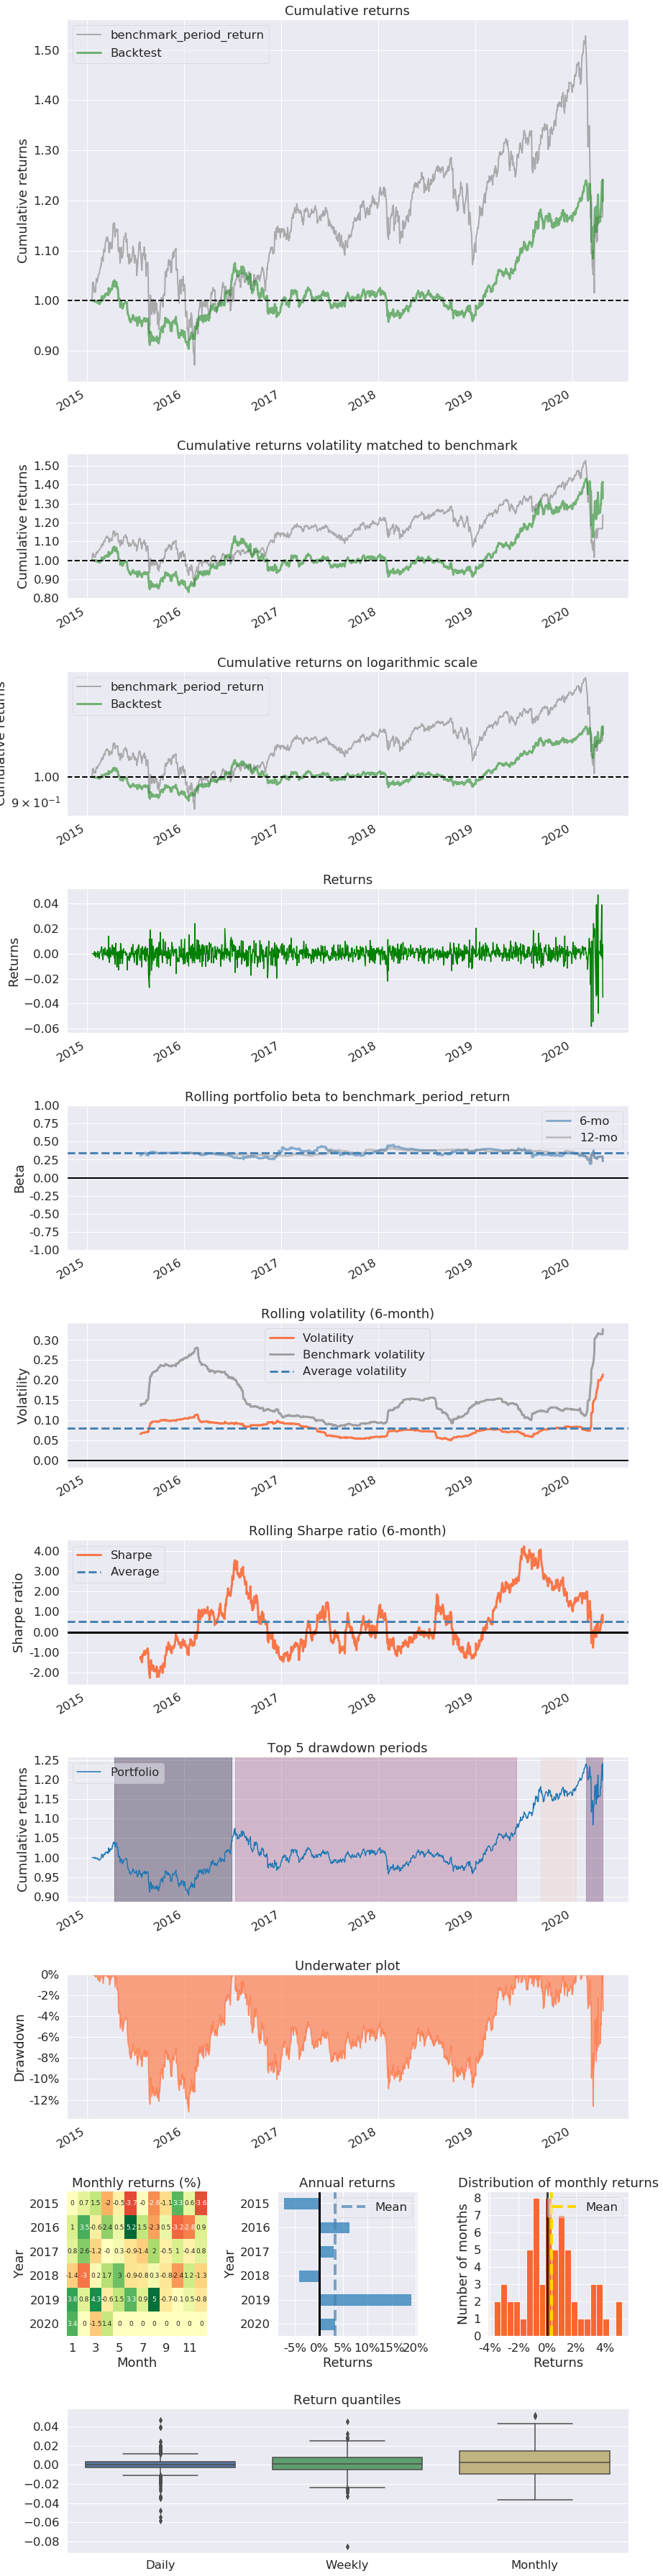

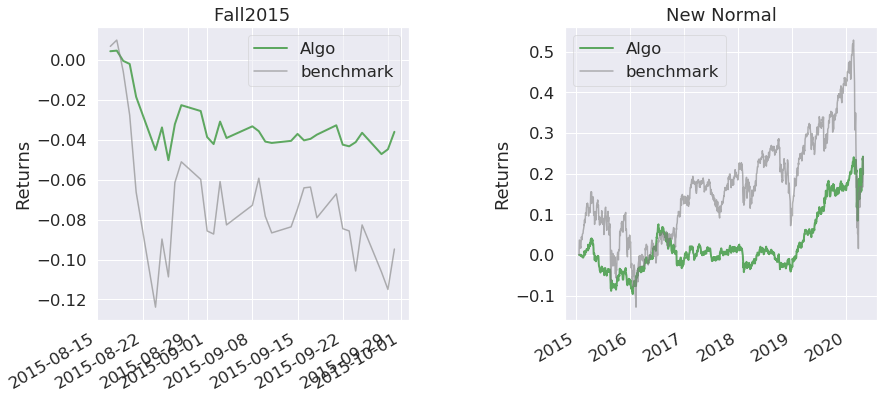

In [13]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
benchmark_period_return = perf['benchmark_period_return']

# Convert benchmark returns to daily returns
daily_returns = (1 + benchmark_period_return) / (1 + benchmark_period_return.shift()) - 1
daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1

# Create tear sheet
#pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=daily_benchmark_returns)
pf.create_full_tear_sheet(returns,benchmark_rets=daily_benchmark_returns)

In [31]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

In [9]:
returns

2015-01-22 00:00:00+00:00    0.000000
2015-01-23 00:00:00+00:00   -0.000059
2015-01-26 00:00:00+00:00   -0.000045
2015-01-27 00:00:00+00:00   -0.000074
2015-01-28 00:00:00+00:00    0.000185
2015-01-29 00:00:00+00:00   -0.001384
2015-01-30 00:00:00+00:00    0.001704
2015-02-02 00:00:00+00:00   -0.000209
2015-02-03 00:00:00+00:00   -0.002695
2015-02-04 00:00:00+00:00    0.000612
2015-02-05 00:00:00+00:00    0.000479
2015-02-06 00:00:00+00:00    0.000199
2015-02-09 00:00:00+00:00   -0.000007
2015-02-10 00:00:00+00:00   -0.002797
2015-02-11 00:00:00+00:00   -0.000935
2015-02-12 00:00:00+00:00    0.001997
2015-02-13 00:00:00+00:00    0.000269
2015-02-17 00:00:00+00:00   -0.004125
2015-02-18 00:00:00+00:00    0.000563
2015-02-19 00:00:00+00:00    0.000071
2015-02-20 00:00:00+00:00    0.001747
2015-02-23 00:00:00+00:00    0.001651
2015-02-24 00:00:00+00:00    0.003952
2015-02-25 00:00:00+00:00    0.002151
2015-02-26 00:00:00+00:00    0.005659
2015-02-27 00:00:00+00:00   -0.001561
2015-03-02 0

In [ ]:
pf.create_full_tear_sheet(returns, positions, transactions, slippage=0, round_trips=True)

Start date,2015-01-22
End date,2020-04-23
Total months,63
,Backtest
Annual return,4.2%
Cumulative returns,24.2%
Annual volatility,9.9%
Sharpe ratio,0.47
Calmar ratio,0.32
Stability,0.50
Max drawdown,-13.2%


/Users/cedriss/miniconda3/envs/env_zipline/envs/env_zipline_remote/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,13.15,2015-04-15,2016-01-19,2016-06-29,316
1,12.58,2020-02-21,2020-03-18,2020-04-23,45
2,10.93,2016-07-11,2018-02-08,2019-06-03,756
3,3.27,2019-09-03,2019-09-13,2020-01-15,97
4,1.50,2019-07-03,2019-07-12,2019-07-23,15


Stress Events,mean,min,max
Fall2015,-0.11%,-2.71%,1.90%
New Normal,0.02%,-5.82%,4.71%


Top 10 long positions of all time,max
sid,
IDTL.L,49.45%
CBU7.AS,35.14%
WLD.PA,33.98%
IAUP.L,14.58%
CRB.PA,8.45%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
IDTL.L,49.45%
CBU7.AS,35.14%
WLD.PA,33.98%
IAUP.L,14.58%
CRB.PA,8.45%
